<a href="https://colab.research.google.com/github/kanchan0104/ml-project/blob/main/hr_analytics_full_analysis_and_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HR ANALYTICS DATASET**

# <center> ----- Loading required libraries and datasets ----- </center>

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting 
from collections import Counter
from sklearn.model_selection import train_test_split

# For Feature Selection
# from mlxtend.feature_selection import SequentialFeatureSelector
# from sklearn.feature_selection import RFECV

# Modeling & Accuracy Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# For HyperParameter Tuning
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading Train data set
dftrain = pd.read_csv("/content/train.csv")
dftrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#Reading Test data set
test=pd.read_csv("/content/test.csv")
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
#Shapes of both the data sets
print("Original Train Set Shape : ",dftrain.shape)
print("Test Set Shape :  ",test.shape)

Original Train Set Shape :  (54808, 14)
Test Set Shape :   (23490, 13)



# <center> ----- PREPROCESSING ----- </center>

***1. Preprocessing lets us to clean data and remove any inconsistencies like null value, duplicate values etc to make further model bulding process hassle free***

In [ ]:
dftrain.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


***This shows a summary of numerical columns***

In [ ]:
#checking for duplicate rows
dupl=dftrain[dftrain.duplicated()]
dupl.shape

(0, 14)

***There are no duplicate rows in the dataframe***

In [ ]:
#Data types of features
dftrain.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

**TOTAL FEATURES - 14<br>
    Categorical Features - 5<br>
    Numerical Featues - 9<br>**

In [ ]:
#Unique values summary of total data set
dftrain.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

***None of the columns have unique value =1 ; this means there are no constant columns***

In [ ]:
#Null values summary of total data set
dftrain.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

   ***i) Since 'education' is a categorical feature here and it also signifies whether the person has obtained a particular level of education or not, we cannot impute the null values as we can't assign an education level to a person on our own. The person may or may not have achieved the assigned level and this will result in an inaccurate analysis***

***ii) On the other hand, 'previous_year_rating' is a numerical feature and it signifies the rating of the employee in the previous year. The NULL value in this column indicates that the employee has been a part of the company for LESS THAN 1 YEAR and does not have a previous year score. Hence we can inmpute these null values with 0*** 

In [ ]:
dftrain['previous_year_rating'].fillna(0,inplace=True)
dftrain['previous_year_rating'].isnull().sum()

0

***No null value remaining in 'previous_year_rating'***

In [ ]:
dftrain[dftrain['is_promoted']==1].shape

(4668, 14)

***There are 4668 records where the value of target variable i.e, 'is_promoted' is 1.***

In [ ]:
dftrain[dftrain.education.isnull()].is_promoted.sum()

122

***Since out of 54808 records in the train set, 2409 records(4.39% of 54808) have NULL in education and out of those 2409 records, 122 records(2.6% of 4668) have 'is_promoted' value as 1. So we can drop these records as they won't bring a significant change in our predictions in the future.***

In [ ]:
#Dropping records with education=NULL
dftrain=dftrain.dropna()
dftrain.shape #2409 records dropped

(52399, 14)

In [ ]:
dftrain.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

***FOR TEST SET***

In [ ]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
test['previous_year_rating'].fillna(0,inplace=True)
test['previous_year_rating'].isnull().sum()

0

In [ ]:
#Dropping records with education=NULL
test=test.dropna()
test.shape #1034 records dropped

(22456, 13)

### Splitting the dataset

It is desirable to split the dataset in such a way that preserves the same proportions of examples in each class as observed in the original dataset.

In [ ]:
#Splitting dataset into train set and validation set
train,val=train_test_split(dftrain,test_size=0.30,random_state=1,stratify=dftrain.is_promoted)

In [ ]:
print("After Splitting: \n")
print("Train set shape : \t",train.shape)
print("Validation set shape : \t",val.shape)
print("\nTarget Variable in Original Data :\t",Counter(dftrain.is_promoted))
print("Target Variable in Train Data : \t",Counter(train.is_promoted))
print("Target Variable in Validation Data :\t",Counter(val.is_promoted))


After Splitting: 

Train set shape : 	 (36679, 14)
Validation set shape : 	 (15720, 14)

Target Variable in Original Data :	 Counter({0: 47853, 1: 4546})
Target Variable in Train Data : 	 Counter({0: 33497, 1: 3182})
Target Variable in Validation Data :	 Counter({0: 14356, 1: 1364})


In [ ]:
#Further splitting Validation set in Val1 and Val2 set for better analysis
val1,val2=train_test_split(val,test_size=0.50,random_state=1,stratify=val.is_promoted)

In [ ]:
print("After Further Splitting: \n")
print("Validation set shape : \t",val.shape)
print("Val1 set shape : \t",val1.shape)
print("Val2 set shape : \t",val2.shape)


print("\nTarget Variable in Validation Data: \t",Counter(val.is_promoted))
print("Target Variable in Val1 Data :  \t",Counter(val1.is_promoted))
print("Target Variable in Val2 Data :  \t",Counter(val2.is_promoted))

After Further Splitting: 

Validation set shape : 	 (15720, 14)
Val1 set shape : 	 (7860, 14)
Val2 set shape : 	 (7860, 14)

Target Variable in Validation Data: 	 Counter({0: 14356, 1: 1364})
Target Variable in Val1 Data :  	 Counter({0: 7178, 1: 682})
Target Variable in Val2 Data :  	 Counter({0: 7178, 1: 682})


***There is no class ratio imbalance after splitting so stratified splitting has worked successfully***

In [ ]:
x_train=train.drop('is_promoted',axis=1)
y_train = train.is_promoted
print("train :",train.shape)
print("xtrain :",x_train.shape)
print("ytrain :",y_train.shape)

train : (36679, 14)
xtrain : (36679, 13)
ytrain : (36679,)


In [ ]:
x_val1=val1.drop('is_promoted',axis=1)
y_val1 = val1.is_promoted
print("val1 :",val1.shape)
print("xval1 :",x_val1.shape)
print("yval1 :",y_val1.shape)

val1 : (7860, 14)
xval1 : (7860, 13)
yval1 : (7860,)


In [ ]:
x_val2=val2.drop('is_promoted',axis=1)
y_val2 = val2.is_promoted
print("val1 :",val2.shape)
print("xval1 :",x_val2.shape)
print("yval1 :",y_val2.shape)

val1 : (7860, 14)
xval1 : (7860, 13)
yval1 : (7860,)


In [ ]:
x_test=test
print("x_test :",x_test.shape)

x_test : (22456, 13)


***All the required datasets have been created, moving on to EDA.....***

# <center>----- EXPLORATORY DATA ANALYSIS (EDA) -----</center> 

***1. EDA helps us to detect patterns and trends which might be useful in drawing insights***

***2. EDA is always done on the "train" dataset and not on Validation/Test sets because it will lead to data leakage and would be inappropriate***


###  EDA BASED ON DEPARTMENT

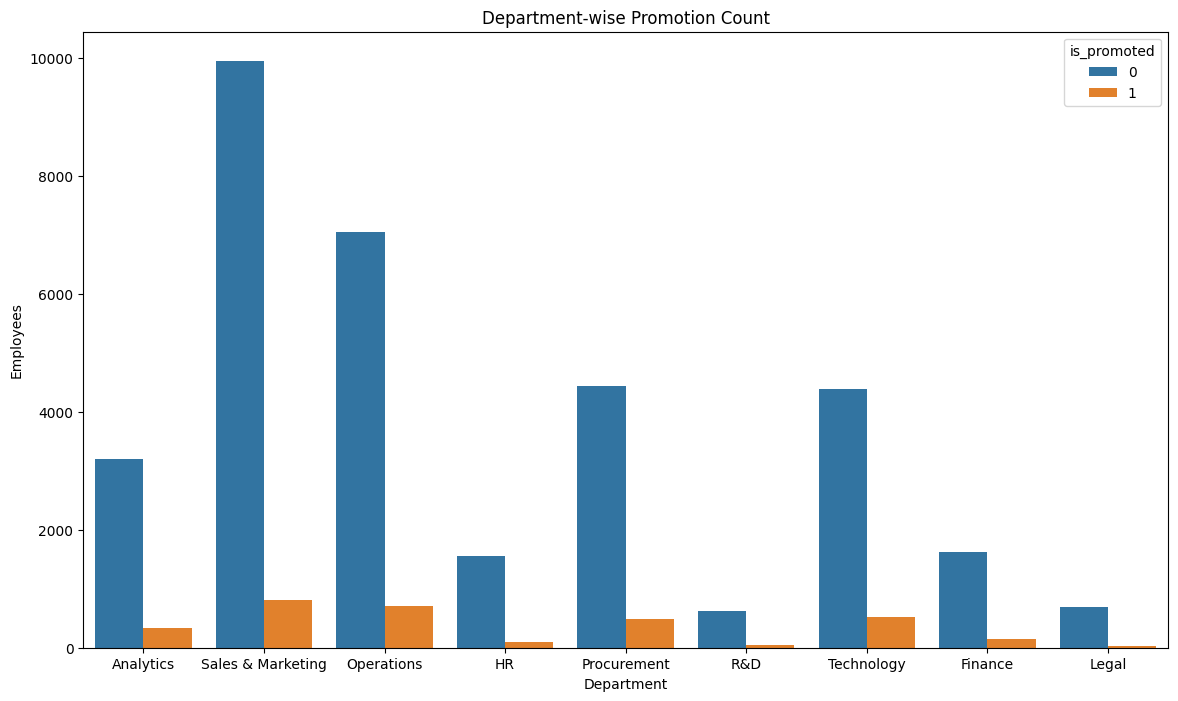

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='department',hue='is_promoted',data=train)
plt.title('Department-wise Promotion Count')
plt.xlabel('Department')
plt.ylabel('Employees')
plt.show()

<b>Insights drawn from the above plots:
1. Technology Dept. has the highest promotion rate across all deparments.
2. Legal Dept. has the lowest promotion rate across all departments.
3. Top 3 Departments to work in on the basis of Promotions are : Technology, Procurement, Analysis</b>

### EDA BASED ON EDUCATION & GENDER

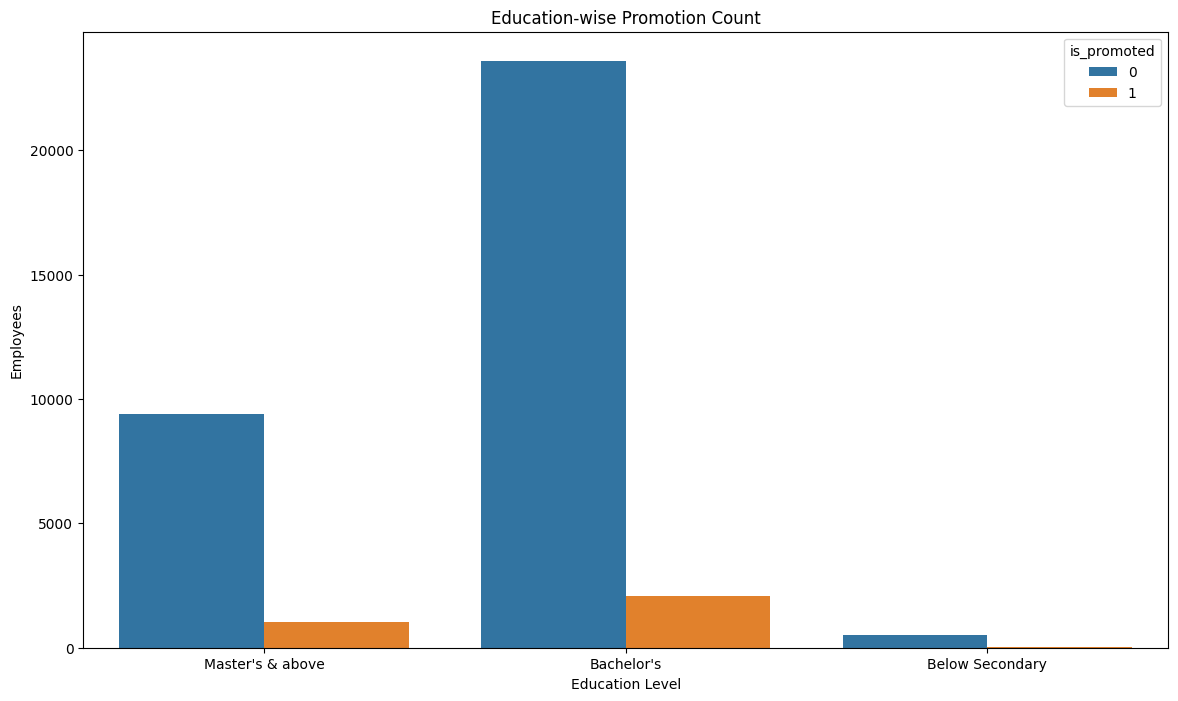

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='education',hue='is_promoted',data=train)
plt.title('Education-wise Promotion Count')
plt.xlabel('Education Level')
plt.ylabel('Employees')
plt.show()

<b>Insights drawn from the above plot:
1. Almost 2/3 rd of the workforce holds a Bachelor's Degree or equivalent.
2. Employees with just Secondary Level Education have also been hired.
  > Indicates that the company focuses on skill rather than degree.


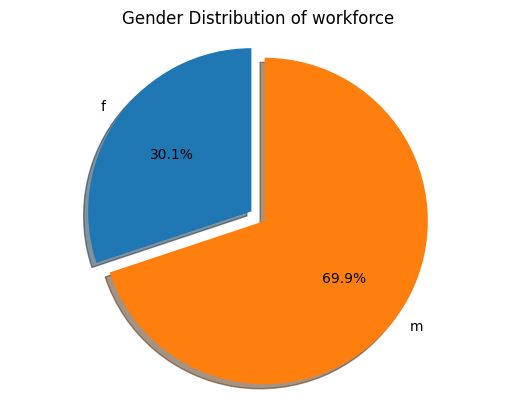

In [ ]:
labels = 'f','m'
sizes = list(train.groupby('gender')['gender'].count())
explode=(0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Gender Distribution of workforce")
plt.show()

<b>Insights drawn from the above plot:
1. There is a huge difference between the number of male employees and and female employees. 70% of the workforce is made up of male employees.
     


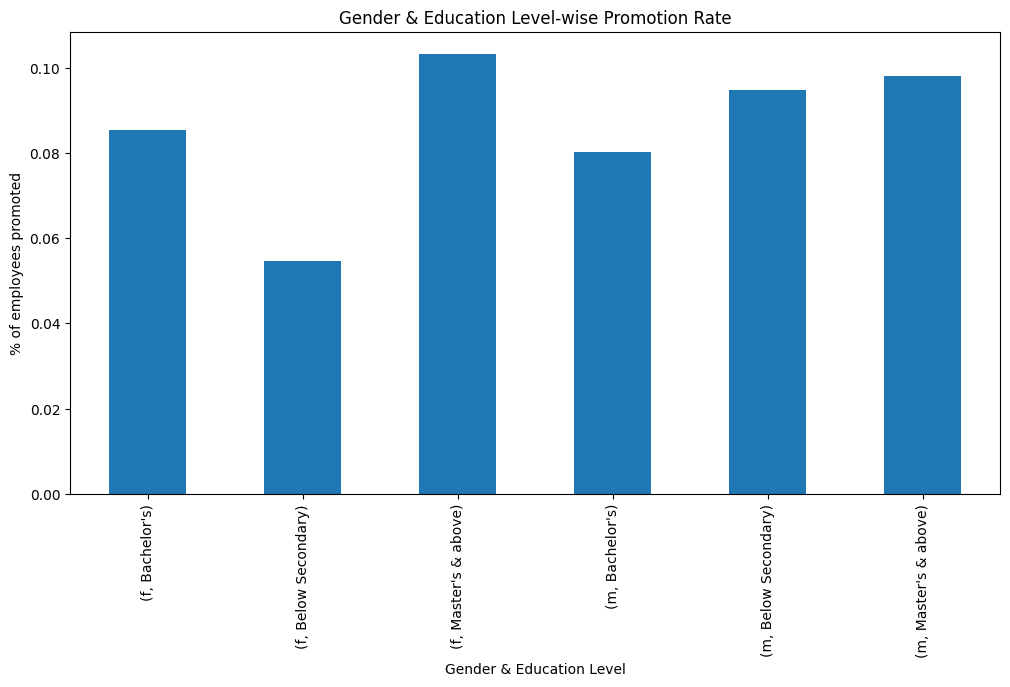

In [ ]:
z=train.groupby(['gender','education','is_promoted'])['is_promoted'].count().unstack().fillna(0)
z['%']=z[1]/(z[0] + z[1])#calculation of promotion %
plt.figure(figsize=(12,6))
z['%'].plot.bar()
plt.title('Gender & Education Level-wise Promotion Rate')
plt.xlabel('Gender & Education Level')
plt.ylabel('% of employees promoted')
plt.show()

<b>Insights drawn from the above plot:
1. Female employees with 'Masters & above' education level have the highest rate of getting promoted in the entire company.
  >The company can use this fact to attract more female employees to work for the company 

2. Among the male employees, those with 'Bachelor's' education level have the least chance of getting promoted due to high competition.
  > Employees should upskill themselves to beat the competition

   

##  EDA BASED ON RECRUITMENT CHANNEL

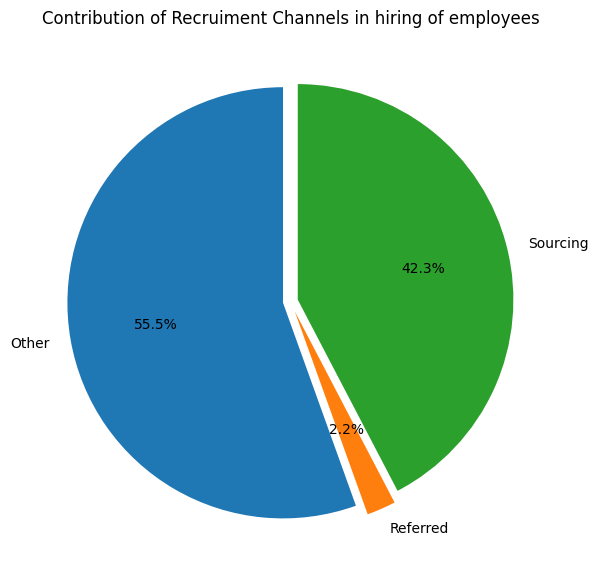

In [ ]:
labels='Other','Referred','Sourcing'
sizes = list(train.groupby('recruitment_channel')['recruitment_channel'].count())
explode=(0.035,0.05,0.035)
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title("Contribution of Recruiment Channels in hiring of employees")
plt.show()

<b>Insights drawn from the above plot:
1. 55.5% of employees have been hired through other channels
2. 2.2% employees hired through referrals
  > Indicates that only a handful of people are given referrals
3. 42.3% employees hired through sourcing

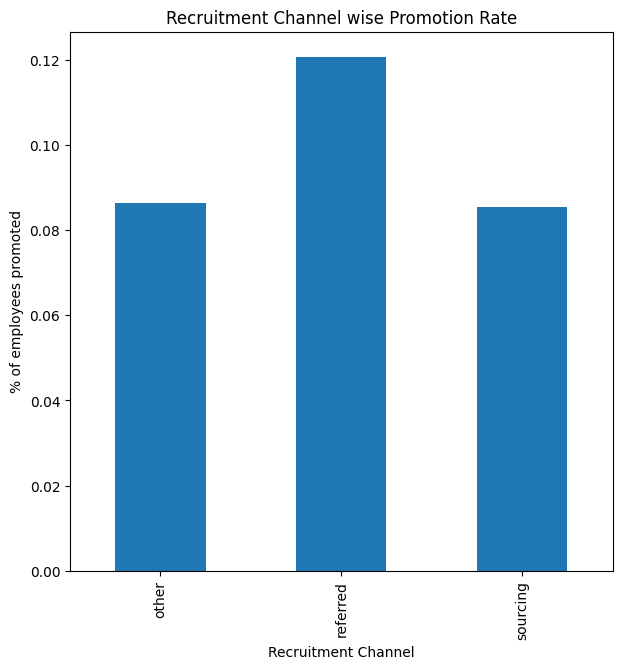

In [ ]:
z=train.groupby(['recruitment_channel','is_promoted'])['is_promoted'].count().unstack().fillna(0)
z['%']=z[1]/(z[0] + z[1])#calculation of promotion %
plt.figure(figsize=(7,7))
z['%'].plot.bar()
plt.title('Recruitment Channel wise Promotion Rate')
plt.xlabel('Recruitment Channel')
plt.ylabel('% of employees promoted')
plt.show()

<b>Insights drawn from the above plot:
1. Even though number of employees hired through referrals is the least, the promotion rate is the highest for them.
    > This indicates that employees only give referrals to those people who are expected to excel at their work after getting selected

##  EDA BASED ON AGE

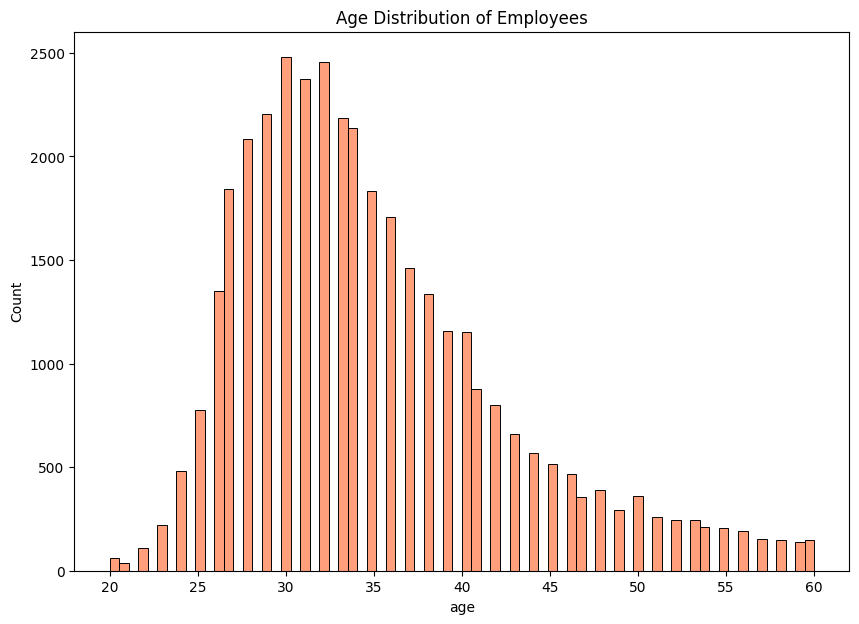

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(train.age,color='coral')
plt.title("Age Distribution of Employees")
plt.show()

<b>Insights drawn from the above plot:
1. The age group of 30-35 has the most number of employees as compared to any other age groups.
  > Signifies that even after gaining moderate amount of experience in the industry, employees prefer to work for this company.
  

##  EDA BASED ON KPIs MET > 80%

In [ ]:
z=train.groupby(['KPIs_met >80%','is_promoted'])['is_promoted'].count().unstack().fillna(0)
z['%']=z[1]/(z[0]+z[1])#calculation of promotion %
z

is_promoted,0,1,%
KPIs_met >80%,,,
0,22686,958,0.040518
1,10811,2224,0.170618


Text(0, 0.5, 'Promotion %')

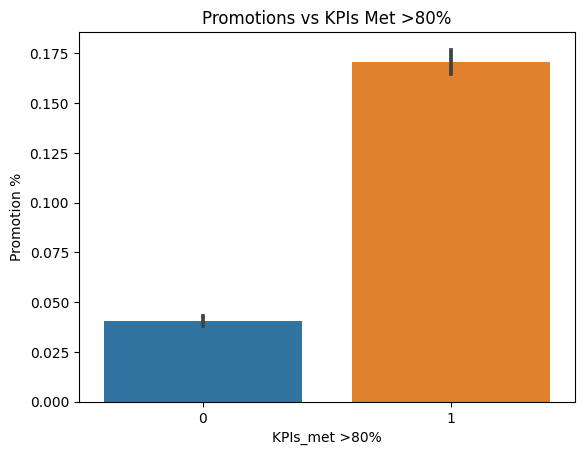

In [ ]:
sns.barplot(x=train['KPIs_met >80%'],y=train['is_promoted'])
plt.title("Promotions vs KPIs Met >80%")
plt.ylabel("Promotion %")

<b>Insights drawn from the above plot:
1. Employees whose KPIs Met is > 80% have a very high chance of getting promoted with respect to those who have < 80%.

##  EDA BASED ON AWARDS WON

In [ ]:
x=train.groupby(['awards_won?','is_promoted'])['is_promoted'].count().unstack().fillna(0)
x['%']=x[1]/(x[0]+x[1])#calculation of promotion %
x

is_promoted,0,1,%
awards_won?,,,
0,33038,2788,0.077821
1,459,394,0.461899


Text(0.5, 0, 'Awards Won ?')

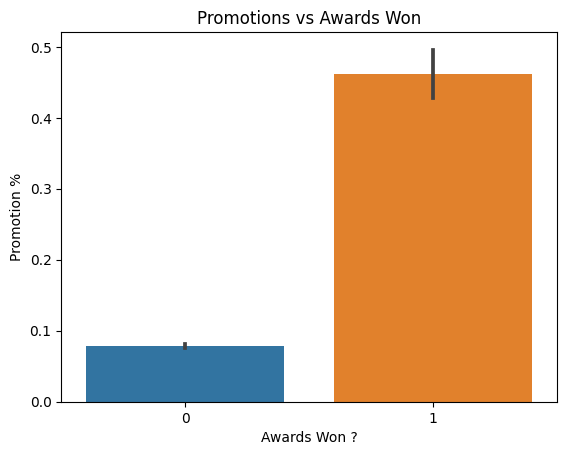

In [ ]:
sns.barplot(x=train['awards_won?'],y=train['is_promoted'])
plt.title("Promotions vs Awards Won")
plt.ylabel("Promotion %")
plt.xlabel('Awards Won ?')

<b>Insights drawn from the above plot:
1. Very high chance of getting promoted if the employee has won an award.
  > Company checks whether the employee has won an award or not while promoting so employees should keep in mind to give their best performance.

### Correlation Matrix

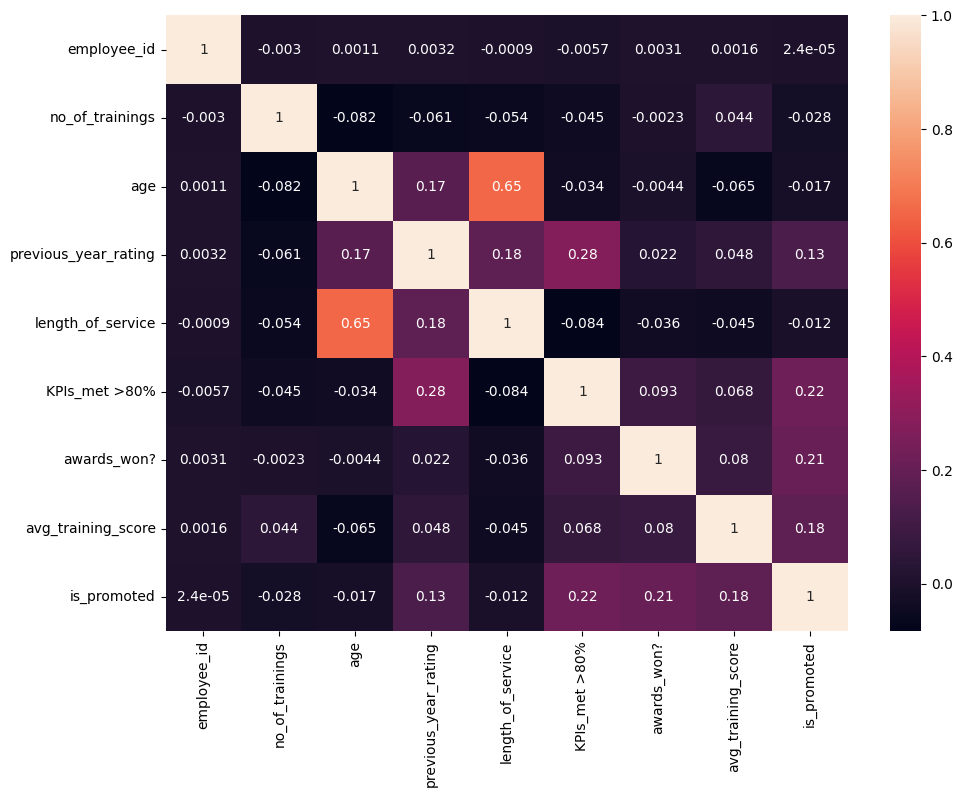

In [ ]:
plt.figure(figsize=(11,8))
sns.heatmap(train.corr(),annot=True)
plt.show()

#### Out of all the numerical columns, ''previous_year_rating'', ''KPIs_met>80%'',''awards_won?'' & ''avg_training_score'' seem to be more correlated to the target feature than the others

# <center> ----- FEATURE ENGINEERING ----- </center>

In [ ]:
train[train.select_dtypes(include=['object']).columns.tolist()].nunique()


department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

*The columns having less number of categories can be One Hot Encoded. Other columns can be Target encoded*

**Performing One Hot Encoding**

In [ ]:
# ONE HOT ENCODING "education" column across all datasets


dummy1=pd.get_dummies(x_train['education'])
x_train=x_train.join(dummy1)

dummy2=pd.get_dummies(x_val1['education'])
x_val1=x_val1.join(dummy2)

dummy3=pd.get_dummies(x_val2['education'])
x_val2=x_val2.join(dummy3)

dummy4=pd.get_dummies(x_test['education'])
x_test=x_test.join(dummy4)

In [ ]:
# Education has been encoded so we can drop it

x_train.drop('education',axis=1,inplace=True)
x_val1.drop('education',axis=1,inplace=True)
x_val2.drop('education',axis=1,inplace=True)
x_test.drop('education',axis=1,inplace=True)


In [ ]:
x_train.head()


,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Bachelor's,Below Secondary,Master's & above
770,26952,Analytics,region_13,m,other,1,34,2.0,6,0,0,86,0,0,1
5419,68849,Sales & Marketing,region_22,f,sourcing,1,36,3.0,5,0,0,47,1,0,0
36583,49809,Operations,region_7,f,other,1,32,3.0,7,0,0,59,1,0,0
51379,8384,HR,region_20,f,other,1,35,3.0,5,0,0,51,0,0,1
23322,35781,HR,region_13,m,other,1,39,3.0,11,0,0,49,1,0,0


In [ ]:
# ONE HOT ENCODING "gender" column across all datasets


dummy1=pd.get_dummies(x_train['gender'])
x_train=x_train.join(dummy1)

dummy2=pd.get_dummies(x_val1['gender'])
x_val1=x_val1.join(dummy2)

dummy3=pd.get_dummies(x_val2['gender'])
x_val2=x_val2.join(dummy3)

dummy4=pd.get_dummies(x_test['gender'])
x_test=x_test.join(dummy4)

In [ ]:
# Gender has been encoded so we can drop it

x_train.drop('gender',axis=1,inplace=True)
x_val1.drop('gender',axis=1,inplace=True)
x_val2.drop('gender',axis=1,inplace=True)
x_test.drop('gender',axis=1,inplace=True)


In [ ]:
x_train.head()
#x_val1.head()
#x_val2.head()

,employee_id,department,region,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Bachelor's,Below Secondary,Master's & above,f,m
770,26952,Analytics,region_13,other,1,34,2.0,6,0,0,86,0,0,1,0,1
5419,68849,Sales & Marketing,region_22,sourcing,1,36,3.0,5,0,0,47,1,0,0,1,0
36583,49809,Operations,region_7,other,1,32,3.0,7,0,0,59,1,0,0,1,0
51379,8384,HR,region_20,other,1,35,3.0,5,0,0,51,0,0,1,1,0
23322,35781,HR,region_13,other,1,39,3.0,11,0,0,49,1,0,0,0,1


In [ ]:
# ONE HOT ENCODING "recruitment_channel" column across all datasets


dummy1=pd.get_dummies(x_train['recruitment_channel'])
x_train=x_train.join(dummy1)

dummy2=pd.get_dummies(x_val1['recruitment_channel'])
x_val1=x_val1.join(dummy2)

dummy3=pd.get_dummies(x_val2['recruitment_channel'])
x_val2=x_val2.join(dummy3)

dummy4=pd.get_dummies(x_test['recruitment_channel'])
x_test=x_test.join(dummy4)

In [ ]:
# Recruitment Channel has been encoded so we can drop it

x_train.drop('recruitment_channel',axis=1,inplace=True)
x_val1.drop('recruitment_channel',axis=1,inplace=True)
x_val2.drop('recruitment_channel',axis=1,inplace=True)
x_test.drop('recruitment_channel',axis=1,inplace=True)


In [ ]:
x_train.head()

,employee_id,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Bachelor's,Below Secondary,Master's & above,f,m,other,referred,sourcing
770,26952,Analytics,region_13,1,34,2.0,6,0,0,86,0,0,1,0,1,1,0,0
5419,68849,Sales & Marketing,region_22,1,36,3.0,5,0,0,47,1,0,0,1,0,0,0,1
36583,49809,Operations,region_7,1,32,3.0,7,0,0,59,1,0,0,1,0,1,0,0
51379,8384,HR,region_20,1,35,3.0,5,0,0,51,0,0,1,1,0,1,0,0
23322,35781,HR,region_13,1,39,3.0,11,0,0,49,1,0,0,0,1,1,0,0


In [ ]:
#Target Encoding Region
x_train['target'] = y_train
target_mapper = x_train.groupby('region')['target'].mean().to_dict()

In [ ]:
x_train.drop('target',axis=1,inplace=True) #dropping temporary column

In [ ]:
x_train.head()

,employee_id,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Bachelor's,Below Secondary,Master's & above,f,m,other,referred,sourcing
770,26952,Analytics,region_13,1,34,2.0,6,0,0,86,0,0,1,0,1,1,0,0
5419,68849,Sales & Marketing,region_22,1,36,3.0,5,0,0,47,1,0,0,1,0,0,0,1
36583,49809,Operations,region_7,1,32,3.0,7,0,0,59,1,0,0,1,0,1,0,0
51379,8384,HR,region_20,1,35,3.0,5,0,0,51,0,0,1,1,0,1,0,0
23322,35781,HR,region_13,1,39,3.0,11,0,0,49,1,0,0,0,1,1,0,0


In [ ]:
# Dropping employee_id column

x_train.drop('employee_id',axis=1,inplace=True)
x_val1.drop('employee_id',axis=1,inplace=True)
x_val2.drop('employee_id',axis=1,inplace=True)
x_test.drop('employee_id',axis=1,inplace=True)


In [ ]:
print("train:",x_train.shape)
print("val1:",x_val1.shape)
print("val2:",x_val2.shape)

train: (36679, 17)
val1: (7860, 17)
val2: (7860, 17)


# <center> ----- FEATURE SELECTION ----- </center>

### Tree Based FS

In [ ]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    # create the random forest model
    model = RandomForestClassifier()

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

In [ ]:
feature_importance=tree_based_feature_importance(x_train,y_train)

ValueError: ignored

In [ ]:
display(feature_importance)

***Analysing all the above results and filtering out unimportant features***

In [ ]:
# Making a list of selected features
selected_features = ['avg_training_score','dept_enc','age',
                     'length_of_service','previous_year_rating',
                     'KPIs_met >80%','no_of_trainings','awards_won?']
x_train[selected_features].head()

In [ ]:
#Creating new datasets with just the selected features
x_train_new=x_train[selected_features]
x_val1_new=x_val1[selected_features]
x_val2_new=x_val2[selected_features]
x_test_new=x_test[selected_features]


### Feature Scaling for better processing in models

In [ ]:


scaler = MinMaxScaler() # create an instance
x_train_scaled = scaler.fit_transform(x_train_new) #  fit  the scaler to the train set and then transform it
x_val1_scaled = scaler.transform(x_val1_new) # transform (scale) the val1 set
x_val2_scaled = scaler.transform(x_val2_new) # transform (scale) the val2 set
x_test_scaled = scaler.transform(x_test_new) # transform (scale) the test set


x_train_scaled[:5]


# <center> ----- MODEL TRAINING ----- </center>

## 1. Logistic Regression Classifier


In [ ]:
# Fitting Logistic Regression to the Training Set
classifier = LogisticRegression()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [ ]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['LGR - Train','LGR - Val1','LGR - Val2']).round(2)
res

***Evaluation Report for Logistic Regression Classifier***

## 2. Decision Tree Classifier

In [ ]:
# Fitting Decision Tree Classifier to the Training Set
classifier = DecisionTreeClassifier()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [ ]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['DT - Train','DT - Val1','DT - Val2']).round(2)
res

***Evaluation Report for Decision Tree Classifier***

## 3. Random Forest Classifier

In [ ]:
# Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [ ]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['RF - Train','RF - Val1','RF - Val2']).round(2)
res

***Evaluation Report for Random Forest Classifier***

## 4. XGBoost Classifier

In [ ]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(x_train_scaled, y_train)
# Predicting the Train Set Results
y_pred = classifier.predict(x_train_scaled)
# Classification Report
reptrain=classification_report(y_train, y_pred, output_dict=True)
reptrain = pd.DataFrame(reptrain).transpose()

In [ ]:
# Predicting the Val1 Set Results
y_pred = classifier.predict(x_val1_scaled)
# Classification Report
repval1=classification_report(y_val1, y_pred, output_dict=True)
repval1 = pd.DataFrame(repval1).transpose()

# Predicting the Val2 Set Results
y_pred = classifier.predict(x_val2_scaled)
# Classification Report
repval2=classification_report(y_val2, y_pred, output_dict=True)
repval2 = pd.DataFrame(repval2).transpose()

res = pd.concat([reptrain[:3],repval1[:3], repval2[:3]], keys=['XGB - Train','XGB - Val1','XGB - Val2']).round(2)
res

***Evaluation Report for XGBoost Classifier***

**We see that out of all models XgBoost has best Performance. So we will use this as final model**


# <center> ----- MAKING PREDICTIONS ON TEST SET ----- </center>


In [ ]:
#We will now make final predictions on XGBoost Classifier model

xgb = XGBClassifier(base_score=0.5, booster='gbtree', verbosity=None)

xgb.fit(x_train_scaled, y_train)

y_test_predicted = xgb.predict(x_test_scaled) #predicting test data
y_test_predicted


In [ ]:
promotions_pred= pd.Series(y_test_predicted)
promotions_pred.shape

In [ ]:
promotions_pred.value_counts().to_frame()

**The model has predicted that out of 22456 employees in the test set, 21749 will not get promotions and 707 employees will be promoted**

In [ ]:
id=pd.Series(test.employee_id).reset_index().drop('index',axis=1)

In [ ]:
# Mapping employee ids of test set with their promotion status for a better understanding

result=pd.concat([id,promotions_pred],axis=1,ignore_index=True)

In [ ]:
#final answer on test set
result.columns=['employee_id','is_promoted']
result